#### LOADING AND UNDERSTANDING OF DATA

In [1]:
import pandas as pd

# Read each CSV file into a pandas DataFrame using read_csv()
ideal_data = pd.read_csv("Ideal_Data.csv")
mapping_data = pd.read_csv("Mapping_File.csv")
validation_data = pd.read_csv("Validation_Data.csv")
working_data = pd.read_csv("Working_Data.csv")

# Display the first few rows of each DataFrame to inspect the data using head()
print("Ideal Data:")
print(ideal_data.head())
print("\n\nMapping File:")
print(mapping_data.head())
print("\n\nValidation Data:")
print(validation_data.head())
print("\n\nWorking Data:")
print(working_data.head())

Ideal Data:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  


Mappin

#### DATA-PREPROCESSING AND FEATURE ENGINEERING

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Handle missing values using imputer
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

# Data cleaning, normalization, and standardization using standard scaler
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns=working_data.select_dtypes(include=['int', 'float']).columns)

# Convert categorical variables into numerical representations by One-hot encoding
encoder = OneHotEncoder()
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical features
ideal_data_preprocessed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)

# Print preprocessed data
print("Ideal Data after preprocessing:")
print(ideal_data_preprocessed.head())
print("\nWorking Data after scaling:")
print(working_data_scaled.head())

Ideal Data after preprocessing:
    QTY  VALUE  MONTH_M1  MONTH_M2  MONTH_M3  STORECODE_P1  STORECODE_P10  \
0  25.0   83.0      True     False     False          True          False   
1   6.0   22.0      True     False     False          True          False   
2   4.0   15.0      True     False     False          True          False   
3  15.0   60.0      True     False     False          True          False   
4   0.0    0.0      True     False     False         False          False   

   STORECODE_P2  STORECODE_P3  STORECODE_P4  ...  BRD_ZANDU  BRD_ZANDU GEL  \
0         False         False         False  ...      False          False   
1         False         False         False  ...      False          False   
2         False         False         False  ...      False          False   
3         False         False         False  ...      False          False   
4          True         False         False  ...      False          False   

   BRD_ZANDU ULTRA POWER  BRD_ZATPAT

#### EXPLORATORY DATA ANALYSIS (EDA)

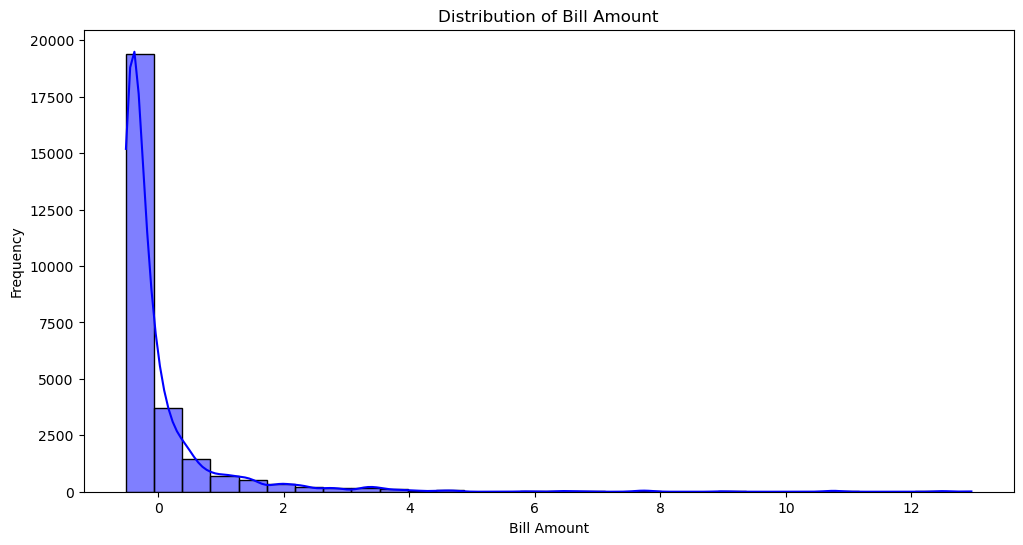

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of key variables
plt.figure(figsize=(12, 6))
sns.histplot(data=working_data_scaled['BILL_AMT'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

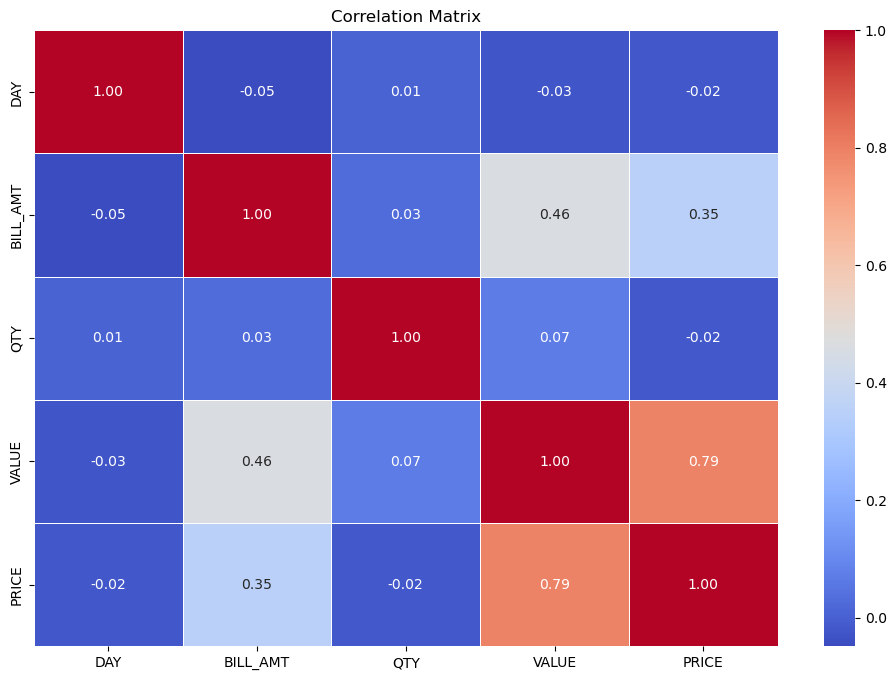

In [4]:
# Explore correlations between different variables
plt.figure(figsize=(12, 8))
correlation_matrix = working_data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

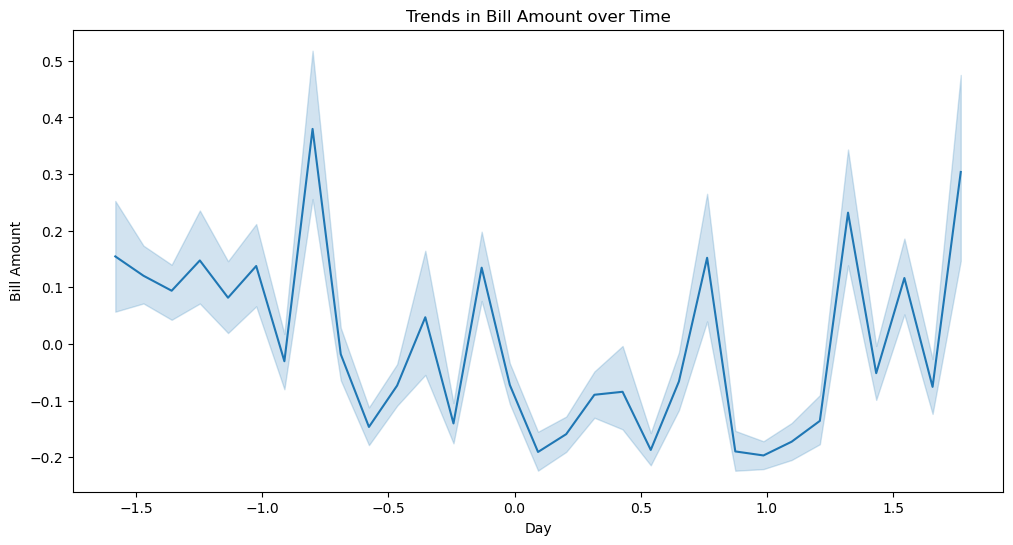

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x='DAY', y='BILL_AMT')
plt.title('Trends in Bill Amount over Time')
plt.xlabel('Day')
plt.ylabel('Bill Amount')
plt.show()

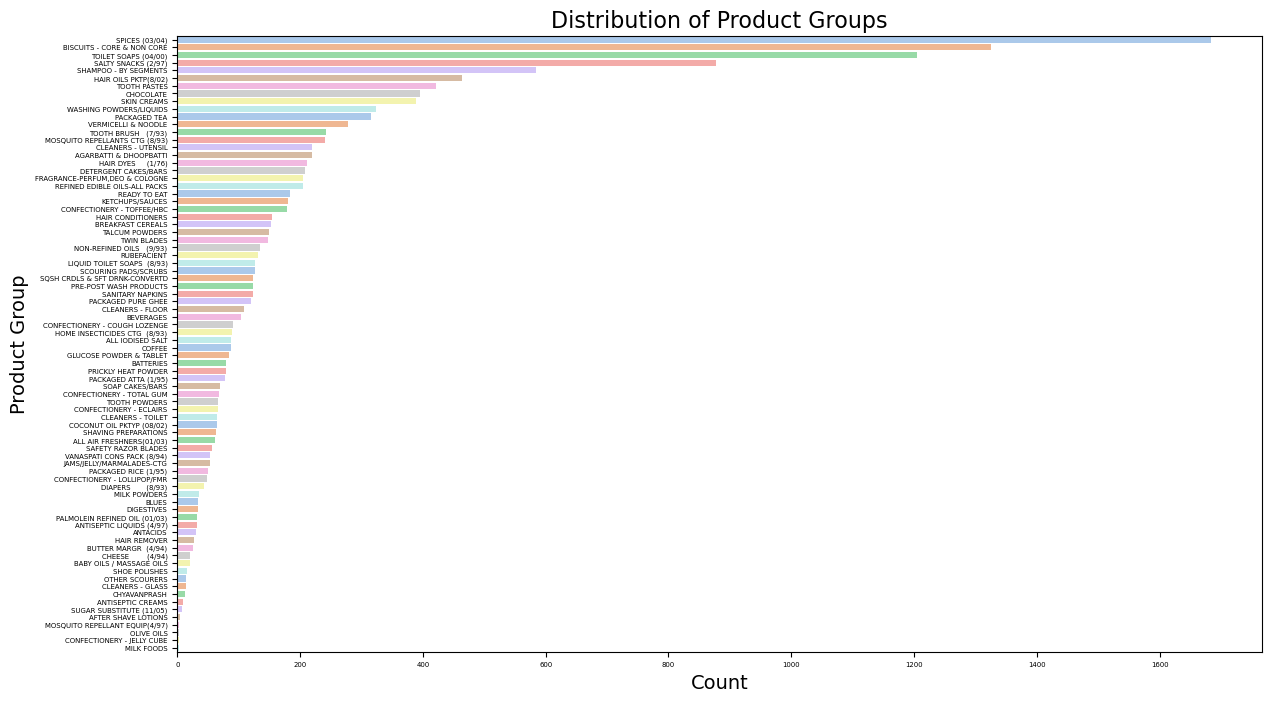

In [6]:
# Visualize the distribution of a categorical variable using a bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')
plt.title('Distribution of Product Groups', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Group', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

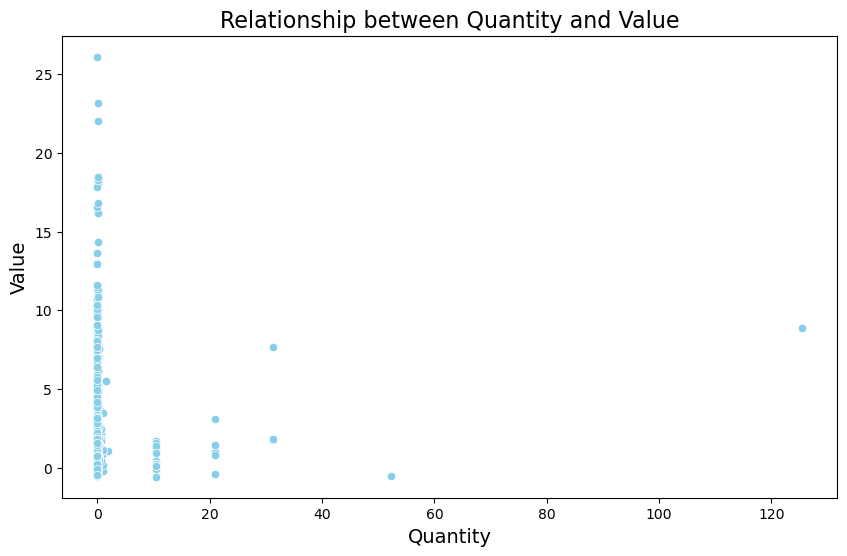

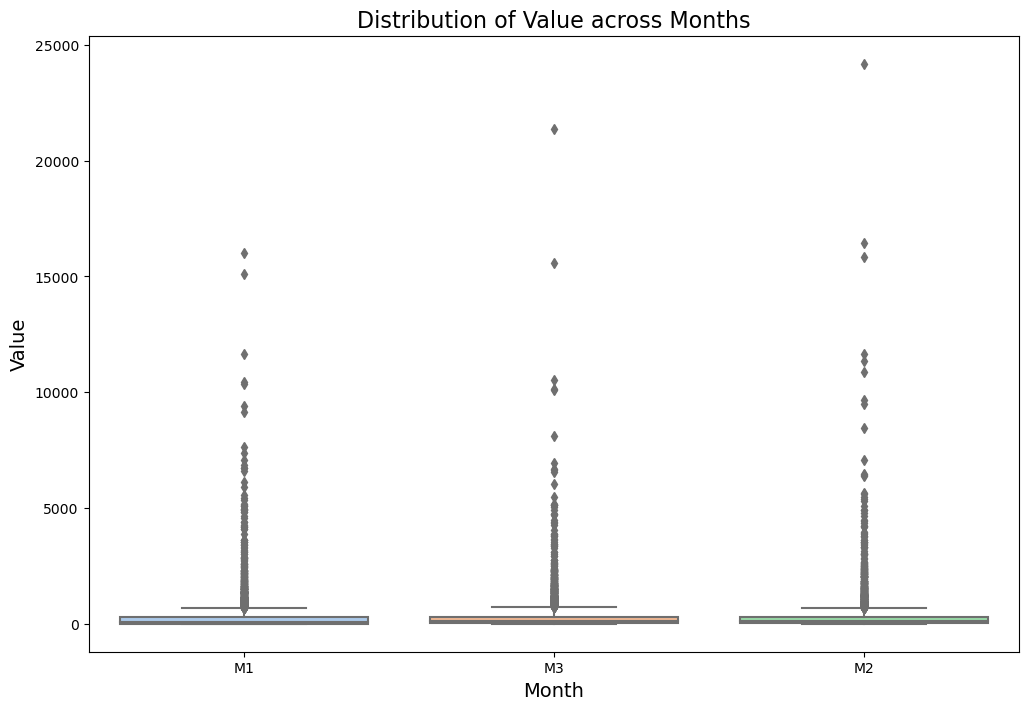

In [7]:
# Scatter plot to explore the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data_scaled, x='QTY', y='VALUE', color='skyblue')
plt.title('Relationship between Quantity and Value', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

# Box plot to visualize the distribution of a numerical variable across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')
plt.title('Distribution of Value across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

# Assuming you have loaded the scaled data into a DataFrame named 'working_data_scaled'

# Assuming the target variable is stored in the 'PRICE' column of your DataFrame
target_variable = working_data_scaled['PRICE']

# Splitting the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Exclude target variable from features
y = target_variable

# Reshape X for Conv1D input
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Define and compile the models
gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mse')

lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mse')

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(units=1)
])
cnn_model.compile(optimizer='adam', loss='mse')

# Train the models
gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the models
gru_loss = gru_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
cnn_loss = cnn_model.evaluate(X_test, y_test)

# Print the evaluation results
print("GRU Model Loss:", gru_loss)
print("LSTM Model Loss:", lstm_loss)
print("CNN Model Loss:", cnn_loss)

C:\Users\mogal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\mogal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.5455 - val_loss: 0.2550
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2944 - val_loss: 0.2532
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2871 - val_loss: 0.2414
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2518 - val_loss: 0.2374
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3535 - val_loss: 0.2380
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3243 - val_loss: 0.2342
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2828 - val_loss: 0.2296
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2210 - val_loss: 0.2472
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2837 - val_loss: 0.2294
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2478 - val_loss: 0.2660
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1847 - val_loss: 0.2265
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2646 - val_loss: 0.2118
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2538 - val_loss: 0.2132
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2394 - val_loss: 0.2063
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2492 - val_loss: 0.2042
Epoch 13/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1950 - val_loss: 0.2003
Epoch 14/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2759 - val_loss: 0.1913
Epoch 15/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2336 - val_loss: 0.1955
Epoch 16/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1860 - val_loss: 0.1850
Epoch 17/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1711 - val_loss: 0.2086
Epoch 18/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2550 - val_loss: 0.1807
Epoch 19/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1876 - val_loss: 0.1811
Epoch 20/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 

#### MODEL TRAINING

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Excluding the target variable
y = working_data_scaled['PRICE']

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_history = gru_model.fit(X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                            y_train.values,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)), y_val.values))
test_loss = gru_model.evaluate(X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test.values)
print("GRU Model Test Loss:", test_loss)

Epoch 1/10


C:\Users\mogal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.3650 - val_loss: 0.2598
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3654 - val_loss: 0.2617
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2416 - val_loss: 0.2546
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3322 - val_loss: 0.2520
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2249 - val_loss: 0.2676
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2631 - val_loss: 0.2705
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2606 - val_loss: 0.2719
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2494 - val_loss: 0.2477
Epoch 9/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2317 - val_loss: 0.2469
Epoch 10/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2036 - val_loss: 0.2153
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3045
GRU Model Test Loss: 0.23298464715480804


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


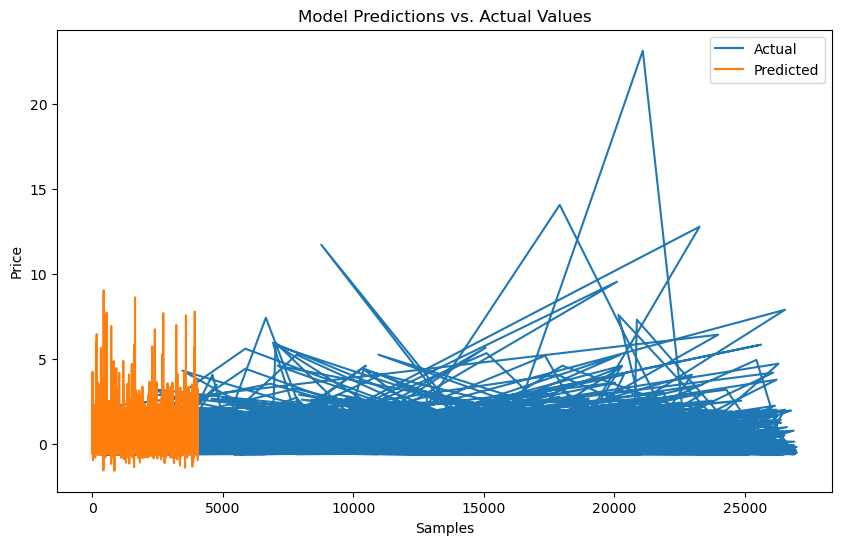

In [10]:
y_pred = gru_model.predict(X_test)
y_true = y_test

# Visualize Model Outputs

plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

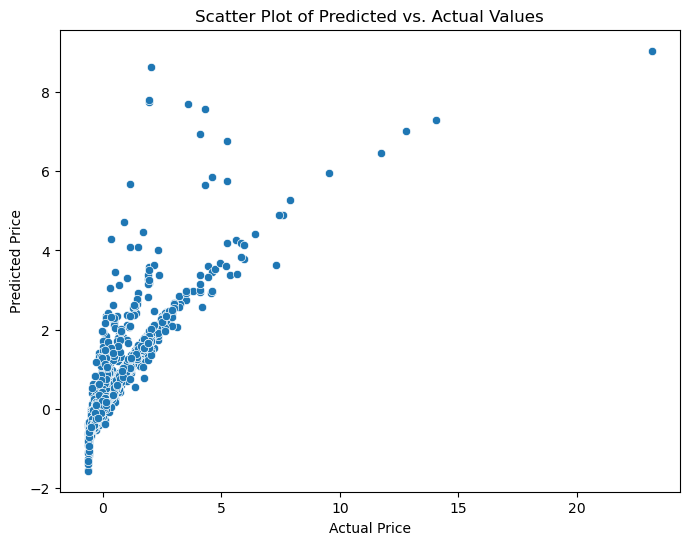

In [11]:
# Example: Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true.values.flatten(), y=y_pred.flatten())
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [12]:
#  Extract Actionable Insights
# Derive actionable insights from the model predictions
# Example: Calculate the mean absolute error (MAE) to evaluate model performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.16194416129503655


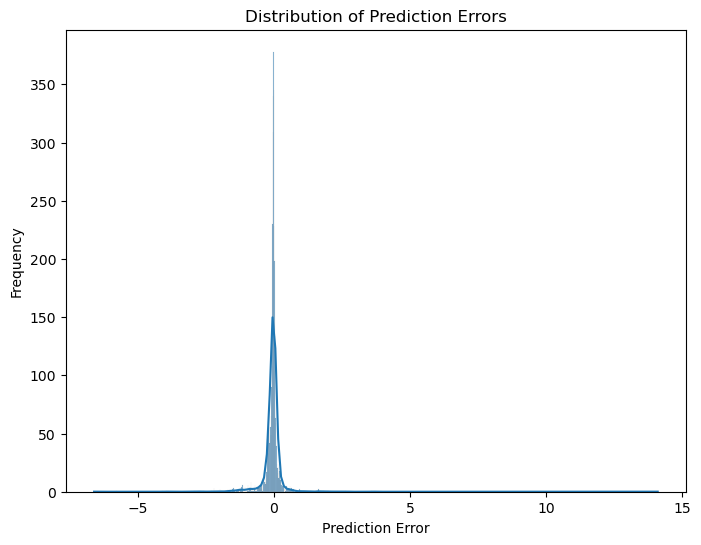

In [13]:
#  Identify Areas for Improvement
# Evaluate model performance and identify areas for improvement
# Plot the distribution of prediction errors
errors = (y_true.squeeze() - y_pred.squeeze())
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

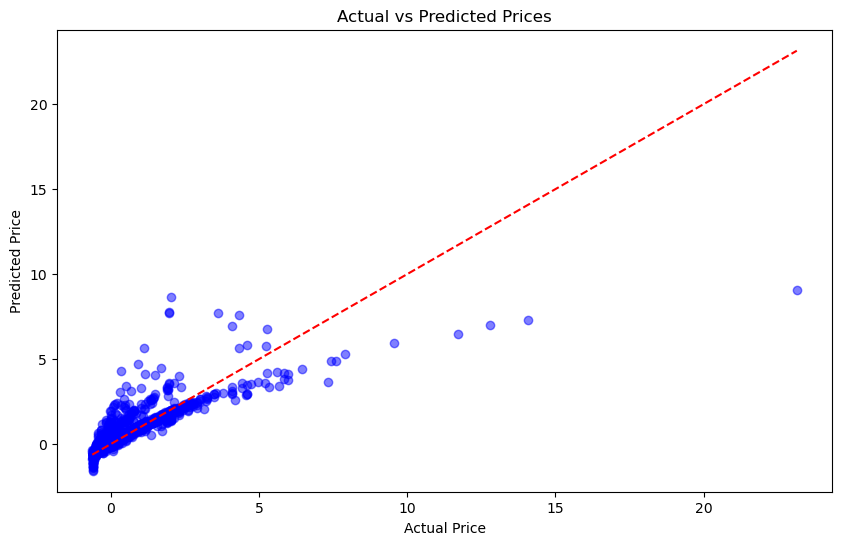

In [14]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Root Mean Squared Error (RMSE): 0.47544869970633263


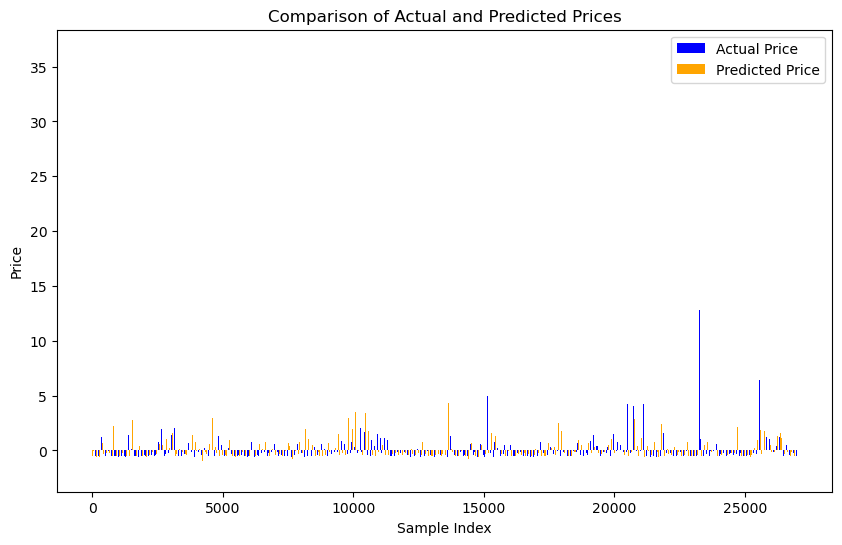

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Assuming 'working_data_scaled' contains your scaled dataset
df = working_data_scaled

# Assume 'X' contains the features used for prediction
X = df.drop(columns=['PRICE'])
y_true = df['PRICE']

# Load the trained model
model = gru_model

# Use the model to make predictions
y_pred = model.predict(X)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(np.arange(len(y_true)), y_true, width=bar_width, label='Actual Price', color='blue')
plt.bar(np.arange(len(y_pred)) + bar_width, y_pred.flatten(), width=bar_width, label='Predicted Price', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()

In [16]:
validation_data_file = "Validation_Data.csv"
validate_df=pd.read_csv(validation_data_file)
validate_df.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [17]:
df=working_data_scaled
X = df.drop(columns=['PRICE'])
y_true = df['PRICE']
y_pred = gru_model.predict(X)
print("Shape of y_pred:", y_pred.shape)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Shape of y_pred: (26985, 1)


In [18]:
# Check the shape of validate_df['ID']
print("Shape of ID column:", validate_df['ID'].shape)

# Check the shape of y_pred
print("Shape of y_pred:", y_pred.shape)

Shape of ID column: (2430,)
Shape of y_pred: (26985, 1)


In [19]:
# Filter y_pred based on the length of validate_df['ID']
y_pred_filtered = y_pred[:len(validate_df['ID'])]

# Convert predictions to integers and ensure non-negativity
y_pred_int = np.round(y_pred_filtered).astype(int)
y_pred_int[y_pred_int < 0] = 0

# Create the DataFrame for OUTPUT
output_df = pd.DataFrame({'ID': validate_df['ID'], 'TOTALVALUE': y_pred_int.flatten()})

In [20]:
print(output_df.head(10))

        ID  TOTALVALUE
0  1112535           2
1  1112539           0
2  1112543           0
3  1112547           1
4  1112551           0
5  1112555           0
6  1112559           0
7  1112563           0
8  1112567           0
9  1112571           0
